In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Đọc dữ liệu
df = pd.read_csv("salary_data.csv")
df.head()

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan


In [29]:
# Kích thước bộ dữ liệu
df.shape

(1426, 3)

In [30]:
# Mô tả bộ dữ liệu
df.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


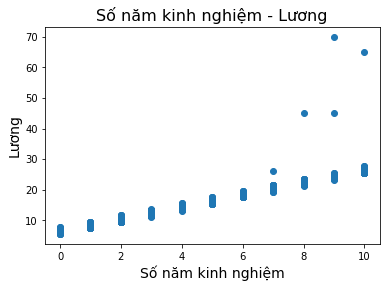

In [31]:
# Mối liên hệ giữa lương và số năm kinh nghiệm
plt.scatter(df["SoNamKinhNghiem"], df["Luong"])
plt.title("Số năm kinh nghiệm - Lương", fontsize = 16)
plt.xlabel("Số năm kinh nghiệm", fontsize = 14)
plt.ylabel("Lương", fontsize = 14)
plt.show()

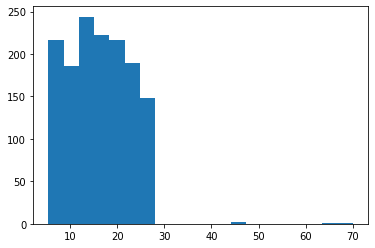

In [32]:
# Biểu đồ phân bố lương
plt.hist(df["Luong"], 20)
plt.show()

In [33]:
df["NganhNghe"].unique()

array(['KeToan', 'HCNS', 'Sale'], dtype=object)

In [34]:
df_ketoan = df[df["NganhNghe"] == "KeToan"]
print(f"Số lượng mẫu nhân viên kế toán: {df_ketoan.shape[0]}")

Số lượng mẫu nhân viên kế toán: 472


In [35]:
df_hcns = df[df["NganhNghe"] == "HCNS"]
print(f"Số lượng mẫu nhân viên HCNS: {df_hcns.shape[0]}")

Số lượng mẫu nhân viên HCNS: 566


In [36]:
df_sale = df[df["NganhNghe"] == "Sale"]
print(f"Số lượng mẫu nhân viên Sale: {df_sale.shape[0]}")

Số lượng mẫu nhân viên Sale: 388


In [37]:
n_by_nganhnghe = df.groupby("NganhNghe")["Luong"].mean()
n_by_nganhnghe

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

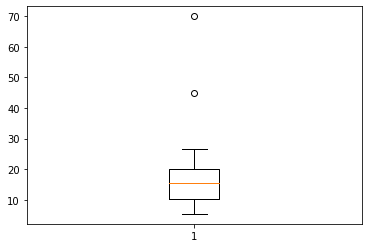

In [38]:
# Biểu đồ phân bố lương của nhân viên kế toán
plt.boxplot(df_ketoan["Luong"])
plt.show()

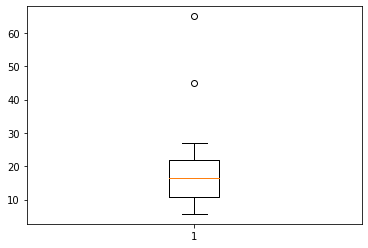

In [39]:
# Biểu đồ phân bố lương của nhân viên HCNS
plt.boxplot(df_hcns["Luong"])
plt.show()

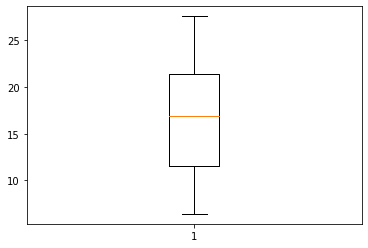

In [40]:
# Biểu đồ phân bố lương của nhân viên Sale
plt.boxplot(df_sale["Luong"])
plt.show()

### Xây dưng model dự đoán tiền lương theo số năm kinh nghiệm

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
x = df["SoNamKinhNghiem"].values.reshape(-1, 1)
y = df["Luong"].values.reshape(-1, 1)

In [53]:
# Chia bộ dữ liệu làm 2 tập train và test theo tỷ lệ 80% train và 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
# Khai báo mô hình hồi quy tuyến tính
regressor = LinearRegression()

# Huấn luyện mô hình
regressor.fit(x_train, y_train)

print("Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm\n với các hệ số a, b lần lượt là")
print(regressor.intercept_)
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm
 với các hệ số a, b lần lượt là
[6.35592115]
[[2.03289729]]


### Đánh giá mô hình

In [48]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [49]:
# Dự đoán trên số năm kinh nghiệm của bộ dữ liệu test để tính toán r2 của model
y_pred = regressor.predict(x_test)

In [51]:
r2_train = r2_score(y_train, regressor.predict(x_train))
print(f"R2 trên tập huấn luyện của model là: {r2_train}")

R2 trên tập huấn luyện của model là: 0.9318331044271062


In [54]:
r2_test = r2_score(y_test, y_pred)
print(f"R2 trên tập kiểm tra của model là: {r2_test}")

R2 trên tập kiểm tra của model là: 0.8762196686203844


In [56]:
new_df = pd.DataFrame({"Số năm kinh nghiệm": x_test.flatten(), "Lương thực tế": y_test.flatten(), "Lương dự báo": y_pred.flatten()})
print("Đánh giá năng lực dự báo trung bình trên tập test")
print(f"Sai số dự báo trung bình: {metrics.mean_absolute_error(y_test, y_pred)}")

Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.5566819767125358


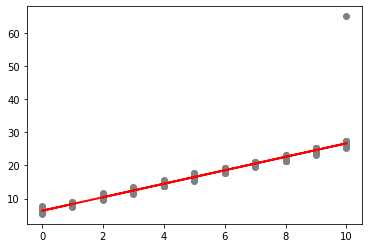

In [57]:
plt.scatter(x_test, y_test, color = "gray")
plt.plot(x_test, y_pred, color = "red", linewidth = 2)
plt.show()